In [37]:
!pip install -q snscrape

In [38]:
import os
import pandas as pd
from datetime import date
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
today=date.today()
end_date=today
print(end_date)
search_term="ukraine OR russia OR ukraine war OR russia war OR russia ukraine war"
max_results = 1000
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {end_date} twitter-search '{search_term} lang:en ' > scraped-tweets.txt"
os.system(extracted_tweets)

2022-11-09


0

In [40]:
df = pd.read_csv('covid19-tweets.txt', names=['Tweets'])
df.head(10)
tweets=df.to_numpy()
print(tweets.shape)
tweets= tweets.reshape(-1)
print(tweets.shape)

(995, 1)
(995,)


In [41]:
stemmer=WordNetLemmatizer()
def cleaner(ndarr):
  tweets=ndarr.copy()
  pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))';
  for i in range(len(tweets)):
      tweet=tweets[i]
      tweet=re.sub(pattern," ",str(tweet)) #urls
      tweet=re.sub(r"\W"," ",tweet) #special chars
      tweet=re.sub(re.escape(string.punctuation),"",tweet) #punctuation
      tweet=re.sub(r"\s+[a-zA-Z]\s+"," ",tweet) #remove single char
      tweet=re.sub(r"\^[a-zA-Z]\s+"," ",tweet)  #remove single char from start and end
      tweet=re.sub(r"\s+"," ",tweet,flags=re.I) #remove extra spaces
      tweet=tweet.lower()
      tweet=tweet.split()
      tweet=[stemmer.lemmatize(word) for word in tweet]
      tweet=[word for word in tweet if word not in stopwords.words("english")]

      tweet=" ".join(tweet)
      tweets[i]=tweet
  return tweets

In [42]:
tweets=cleaner(tweets)
tweets=cleaner(tweets)
print(tweets[:5])
df["Tweets"]=tweets
df["Tweets"].drop_duplicates(inplace = True)
df.to_csv("clean-tweets.csv",index=False)

['saxena_puru sector go rinse cycle ukraine war eu going deep cold winter xle high lock profit protection'
 'russia army may recover ukraine war putin ha lost half tank find difficult rebuild pentagon say xa0 nvia'
 'ukraine war latest russian leader kherson killed telegraph news'
 'russia army may recover ukraine war putin ha lost half tank find difficult rebuild pentagon say xa0 nvia'
 'ukraine war latest russian leader kherson killed xa0telegraph']


In [ ]:
from itertools import chain
keywords=[x.split() for x in tweets]
keywords = list(chain.from_iterable(keywords))
keywords

<FreqDist with 58 samples and 3553 outcomes>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


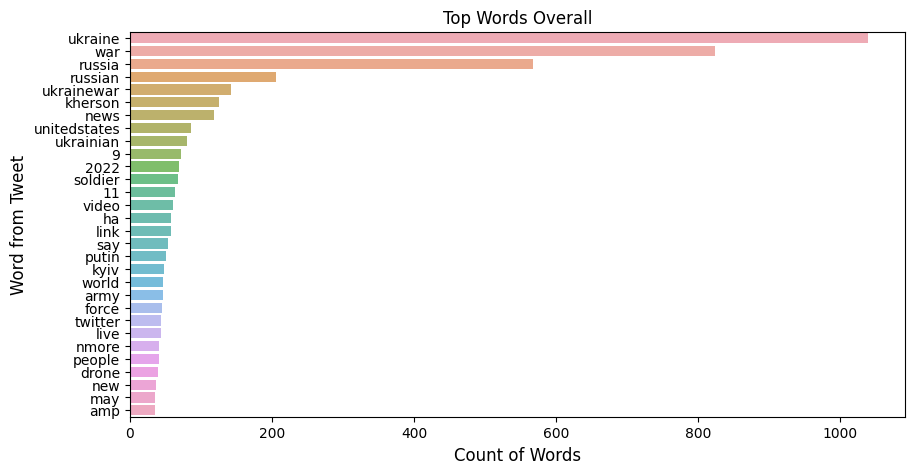

In [44]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.DataFrame(keywords)
df2 = df2[0].value_counts()

freq = FreqDist()
for words in df2:
    freq[words] += 1

print(freq)

df2 = df2[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df2.values, df2.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [45]:
from textblob import TextBlob
def classfier(x):
  if(x>0):
    return "Positive"
  elif (x==0):
    return "Neutral"
  else:
    return "Negative"
df["polarity"]=df["Tweets"].apply(lambda x :TextBlob(x).sentiment[0])
df["Subjectivity"]=df["Tweets"].apply(lambda x :TextBlob(x).sentiment[1])
df["Lenght"]=df["Tweets"].apply(lambda x : len(x.split()))
# df["class"]=df["polarity"].apply(lambda x:  "POSITIVE" if x > 0 else "NEGATIVE" )
df["class"]=df["polarity"].apply(lambda x:  classfier(x))

In [46]:
df.head(20)

,Tweets,polarity,Subjectivity,Lenght,class
0,saxena_puru sector go rinse cycle ukraine war ...,-0.146667,0.646667,17,Negative
1,russia army may recover ukraine war putin ha l...,-0.333333,0.583333,18,Negative
2,ukraine war latest russian leader kherson kill...,0.100000,0.300000,9,Positive
3,russia army may recover ukraine war putin ha l...,-0.333333,0.583333,18,Negative
4,ukraine war latest russian leader kherson kill...,0.100000,0.300000,8,Positive
5,british intelligence update ukraine war today ...,0.250000,0.450000,12,Positive
6,kambaimagic 7 year sir ncost food rising today...,-0.125000,0.375000,11,Negative
7,dailyloud long ukraine war go,-0.050000,0.400000,5,Negative
8,senategop inflation worldwide problem caused c...,0.000000,0.000000,20,Neutral
9,ukraine drone drop bomb right next russian tro...,0.095238,0.178571,9,Positive


In [47]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tweets)
positive = 0
negative = 0
neutral = 0
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 
 if neg > pos:
  negative_list.append(tweet)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet)
  positive += 1
 elif pos == neg:
  neutral_list.append(tweet)
  neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

In [48]:
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(df["Tweets"]))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  995
positive number:  144
negative number:  762
neutral number:  89


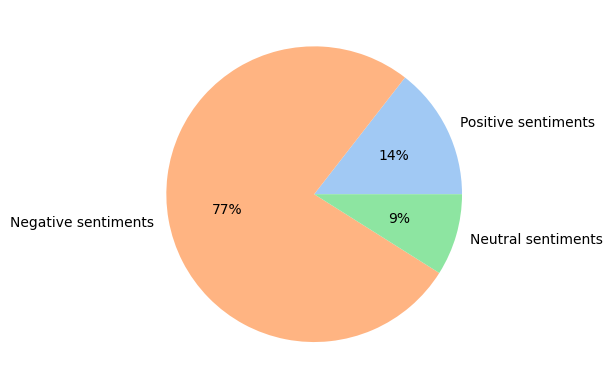

In [49]:
colors = sns.color_palette('pastel')[0:5]
plt.pie([len(positive_list),len(negative_list),len(neutral_list)], labels = ["Positive sentiments","Negative sentiments","Neutral sentiments"], colors = colors, autopct='%.0f%%')
plt.show()

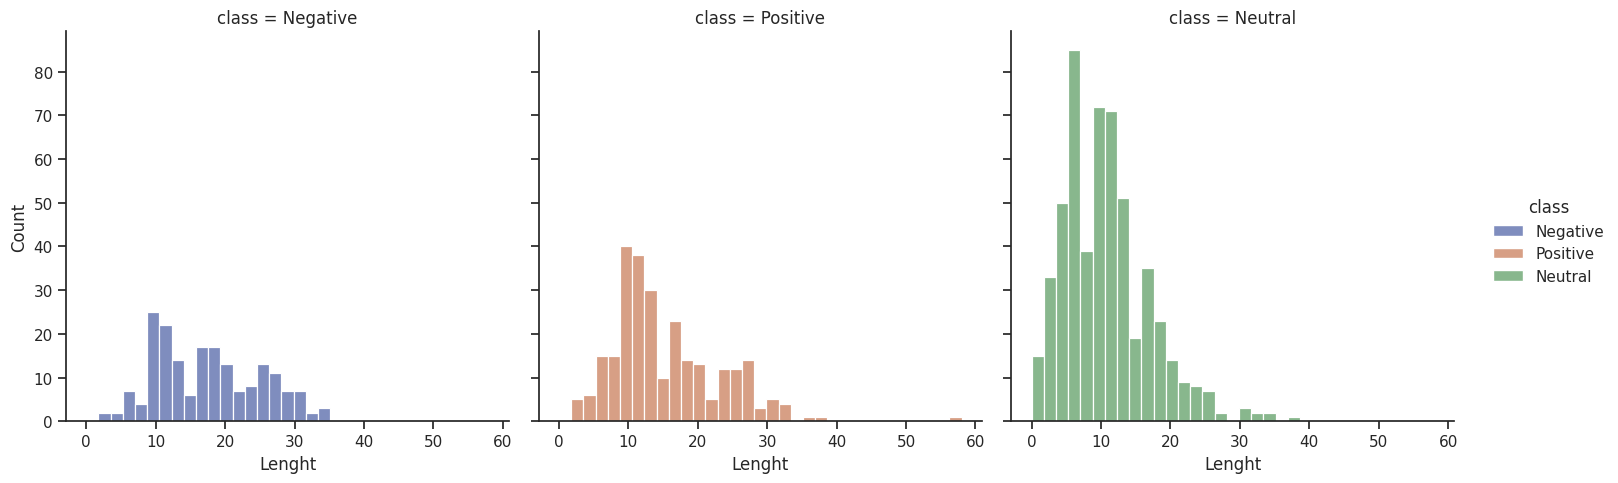

In [50]:
sns.set_theme(style="ticks", color_codes=True)
sns.displot(data=df, x="Lenght",hue="class",col="class", palette="dark")

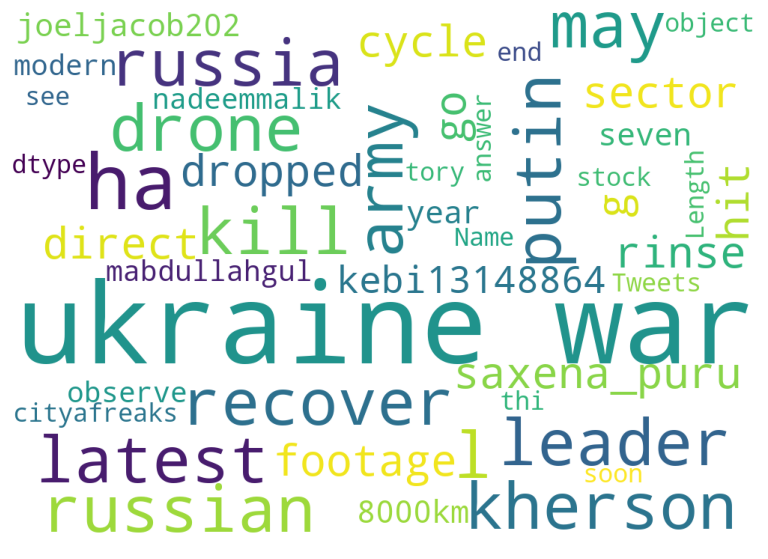

In [51]:
from wordcloud import WordCloud


# Generate a word cloud image
Tweets_String=str(df["Tweets"])

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
  
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweets_String)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [53]:
df.columns

Index(['Tweets', 'polarity', 'Subjectivity', 'Lenght', 'class'], dtype='object')

In [54]:
target=df["class"]
df2=df.copy()
del df2["Tweets"]
del df2["class"]

In [55]:
df2

,polarity,Subjectivity,Lenght
0,-0.146667,0.646667,17
1,-0.333333,0.583333,18
2,0.100000,0.300000,9
3,-0.333333,0.583333,18
4,0.100000,0.300000,8
...,...,...,...
990,0.050000,0.200000,16
991,-0.108333,0.283333,30
992,0.200000,0.450000,18
993,0.000000,0.000000,10


In [56]:
data_train, data_test, target_train, target_test=train_test_split(df2,target,test_size=0.3)
clf = RandomForestClassifier().fit(data_train,target_train)

In [57]:
clf.score(data_test,target_test)

0.9966555183946488

In [58]:
data_train2, data_test2, target_train2, target_test2=train_test_split(df2,target,test_size=0.2)
clf2 = RandomForestClassifier().fit(data_train2,target_train2)

In [59]:
clf2.score(data_test2,target_test2)

1.0

In [60]:
from sklearn.model_selection import KFold
df3=df2.to_numpy()
kf = KFold(n_splits=10)
kf.get_n_splits(df3)

print(kf)
for train_index, test_index in kf.split(df3):
    X_train, X_test = df3[train_index], df3[test_index]
    y_train, y_test = target[train_index], target[test_index]

clf3 = RandomForestClassifier().fit(X_train,y_train)
clf3.score(X_test,y_test)

KFold(n_splits=10, random_state=None, shuffle=False)


1.0